### 2D 数据类别划分

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
# define X and y
X = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [4]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

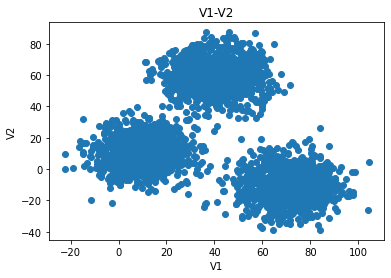

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])
plt.title("V1-V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

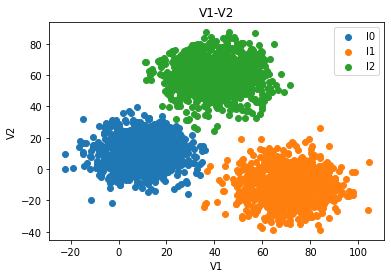

In [9]:
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("V1-V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('l0','l1','l2'))
plt.show()

In [10]:
print(X.shape,y.shape)

(3000, 2) (3000,)


In [11]:
# set the mode 
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [13]:
centers = KM.cluster_centers_
print(centers)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


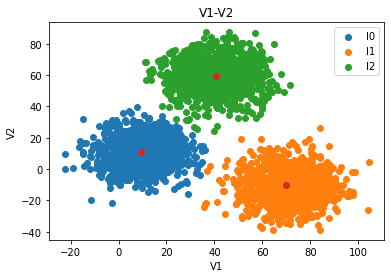

In [14]:
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("V1-V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('l0','l1','l2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [16]:
# test the data
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[1]


In [17]:
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [18]:
# evaluate the model
from sklearn.metrics import accuracy_score
a = accuracy_score(y,y_predict)
a

0.0023333333333333335

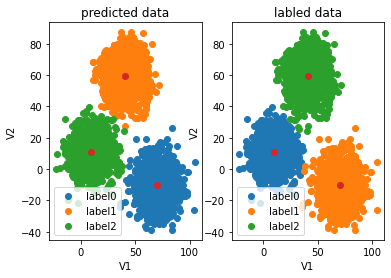

In [19]:
#visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [20]:
#correct the results
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [22]:
print(accuracy_score(y,y_corrected))

0.997


In [23]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


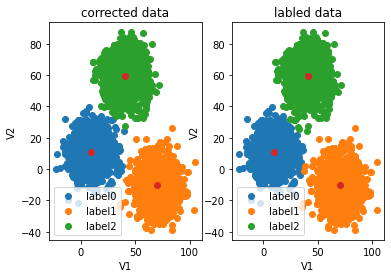

In [24]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected==0],X.loc[:,'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected==1],X.loc[:,'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected==2],X.loc[:,'V2'][y_corrected==2])

plt.title("corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [25]:
#try meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500)
print(bw)

30.84663454820215


In [26]:
#establish the meanshift model-un-supervised model
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [27]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))


0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [28]:
print(centers)#kmeans聚类中心

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


In [29]:
#新增代码 打印使用meanshift算法获取的聚类中心 与kmeans算法对比 中心点非常接近
centers2 = ms.cluster_centers_
print(centers2)#meanshift聚类中心

[[ 40.60158864  59.65137971]
 [ 70.01854306 -10.11803404]
 [  9.56752568  10.79316266]]


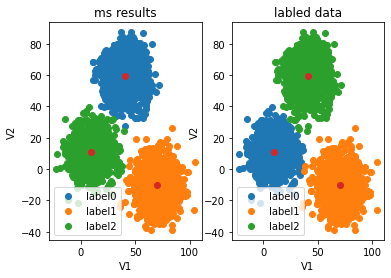

In [30]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])

plt.title("ms results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [31]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [32]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))

<class 'numpy.ndarray'>


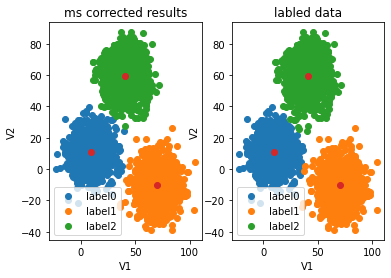

In [33]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==0],X.loc[:,'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==1],X.loc[:,'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==2],X.loc[:,'V2'][y_corrected_ms==2])

plt.title("ms corrected results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [35]:
# set DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [36]:
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
labels = db.labels_

In [43]:
n_clusters_ = len(set(labels)) - (60 if -60 in labels else 0)
n_noise_ = list(labels).count(-1)

In [44]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise point: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise point: 3000
